In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet, ElasticNetCV, MultiTaskElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

In [ ]:
acled_df = pd.read_csv('../data/acled/south_sudan.csv') 
# acled_df = acled_df.drop(['SOURCE', 'SOURCE_SCALE', 'TAGS', 'EVENT_DATE', 'YEAR', 'GEO_PRECISION'], axis=1)
data = acled_df
X = data.drop('FATALITIES', axis=1)
y = data['FATALITIES']

In [13]:
ucdp_df = pd.read_csv("../data/ucdp/south_sudan.csv").drop('low', axis=1) ## 1669 entries, 48 cols
columns_to_keep = ['latitude', 'longitude', 'best', 'date_start']
ucdp_df = ucdp_df[columns_to_keep]
ucdp_df.sort_values(by='date_start', inplace=True)

ucdp_df.dropna(inplace=True)

data = ucdp_df
X = data.drop('best', axis=1)
y = data['best']

In [14]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = preprocessor.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ElasticNet()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.007541951323788099

In [33]:
y_pred = model.predict(X_test)
yp=y_pred

mse = mean_squared_error(y_test, yp)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1806.9037061132576


In [22]:
true_sorted = y_test.sort_index()
pred_sorted = pd.Series(yp).sort_index()

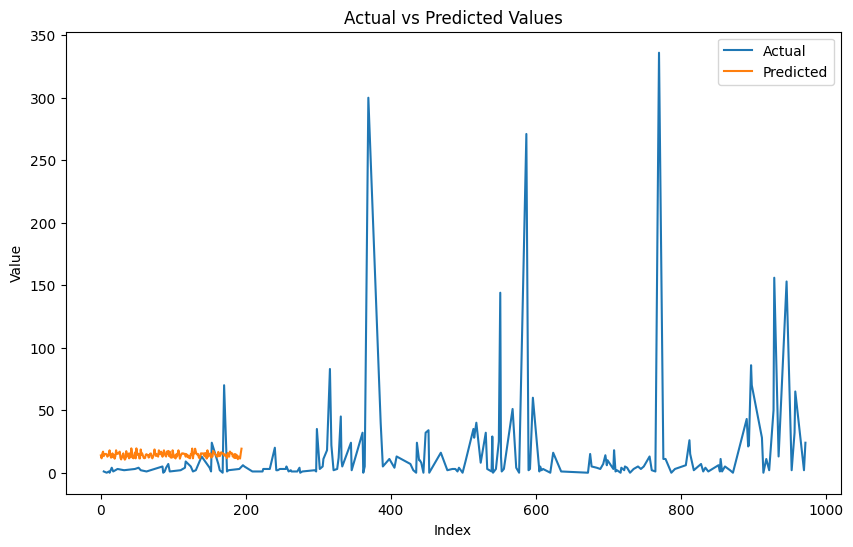

In [24]:
import matplotlib.pyplot as plt

# Visualize actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(true_sorted, label='Actual')
plt.plot(pred_sorted, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()